## Clustering Universities into to two groups, Private and Public Using KMeans algorithm

### Import Packages

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()

### Load and Inspect Data

In [34]:
df = pd.read_csv('College_Data.csv',index_col=0)

In [7]:
df.head()

Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   
Agnes Scott College                 5450    450       875   92        97   
Alaska Pacific University           4120    800      1500   76        72   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Abilene Christian University       18.1           12    7041         60  
Adelphi University                 12.2           16   10527         56  
Adrian College                     12.9           30    8735         54  
Agnes Scott College                 7.7           37   19016         59  
Alaska Pacific University          11.9            2   10922         15

In [8]:
df.shape

(777, 18)

In [9]:
df.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [11]:
df.duplicated().sum()

0

### EDA

In [12]:
df.describe().round(1)

Apps   Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
count    777.0    777.0   777.0      777.0      777.0        777.0   
mean    3001.6   2018.8   780.0       27.6       55.8       3699.9   
std     3870.2   2451.1   929.2       17.6       19.8       4850.4   
min       81.0     72.0    35.0        1.0        9.0        139.0   
25%      776.0    604.0   242.0       15.0       41.0        992.0   
50%     1558.0   1110.0   434.0       23.0       54.0       1707.0   
75%     3624.0   2424.0   902.0       35.0       69.0       4005.0   
max    48094.0  26330.0  6392.0       96.0      100.0      31643.0   

       P.Undergrad  Outstate  Room.Board   Books  Personal    PhD  Terminal  \
count        777.0     777.0       777.0   777.0     777.0  777.0     777.0   
mean         855.3   10440.7      4357.5   549.4    1340.6   72.7      79.7   
std         1522.4    4023.0      1096.7   165.1     677.1   16.3      14.7   
min            1.0    2340.0      1780.0    96.0     250.0    8.0      24.0   
25%           95.0    7320.0      3597.0   470.0     850.0   62.0      71.0   
50%          353.0    9990.0      4200.0   500.0    1200.0   75.0      82.0   
75%          967.0   12925.0      5050.0   600.0    1700.0   85.0      92.0   
max        21836.0   21700.0      8124.0  2340.0    6800.0  103.0     100.0   

       S.F.Ratio  perc.alumni   Expend  Grad.Rate  
count      777.0        777.0    777.0      777.0  
mean        14.1         22.7   9660.2       65.5  
std          4.0         12.4   5221.8       17.2  
min          2.5          0.0   3186.0       10.0  
25%         11.5         13.0   6751.0       53.0  
50%         13.6         21.0   8377.0       65.0  
75%         16.5         31.0  10830.0       78.0  
max         39.8         64.0  56233.0      118.0

<AxesSubplot: xlabel='Apps', ylabel='Accept'>

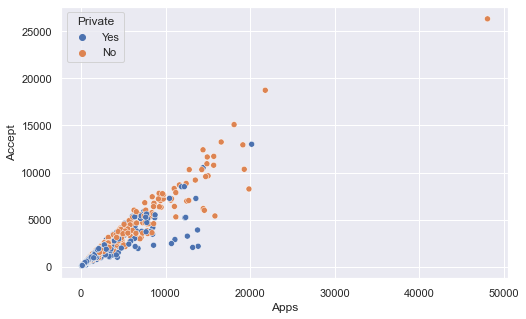

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='Apps',y='Accept',hue='Private')

<AxesSubplot: xlabel='Private', ylabel='count'>

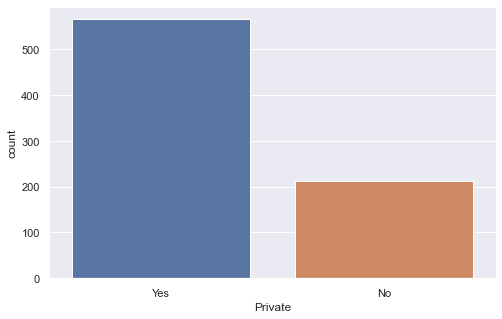

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='Private')

<AxesSubplot: xlabel='F.Undergrad'>

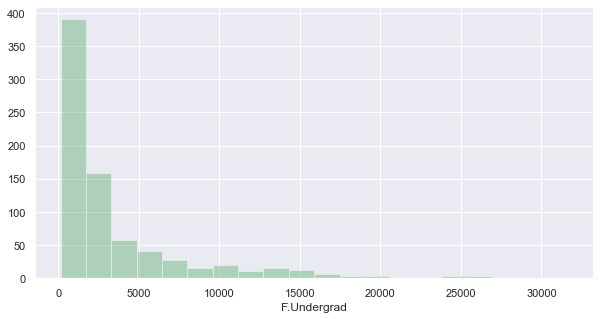

In [16]:
plt.figure(figsize=(10,5))
sns.distplot(df['F.Undergrad'],bins=20,color='g',kde=False)

<AxesSubplot: xlabel='P.Undergrad'>

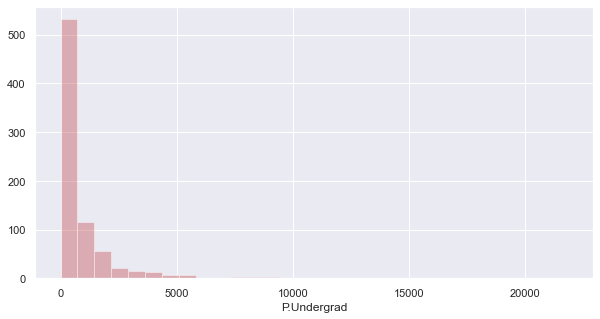

In [20]:
plt.figure(figsize=(10,5))
sns.distplot(df['P.Undergrad'],bins=30,color='r',kde=False)

<AxesSubplot: xlabel='F.Undergrad', ylabel='S.F.Ratio'>

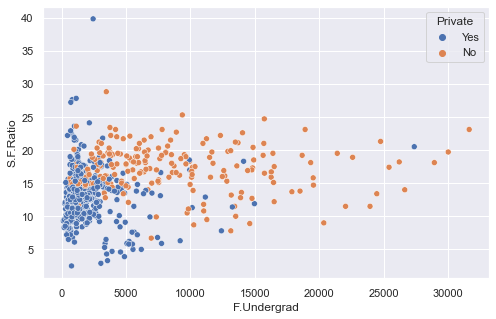

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='F.Undergrad',y='S.F.Ratio',hue='Private')

<AxesSubplot: xlabel='P.Undergrad', ylabel='S.F.Ratio'>

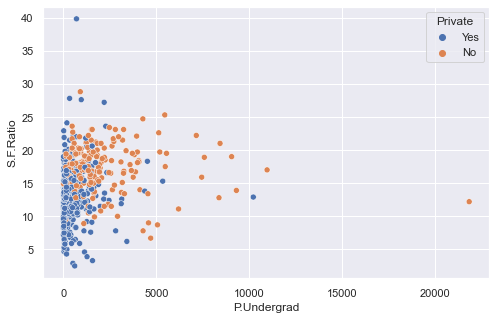

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='P.Undergrad',y='S.F.Ratio',hue='Private')

<AxesSubplot: xlabel='Grad.Rate', ylabel='Density'>

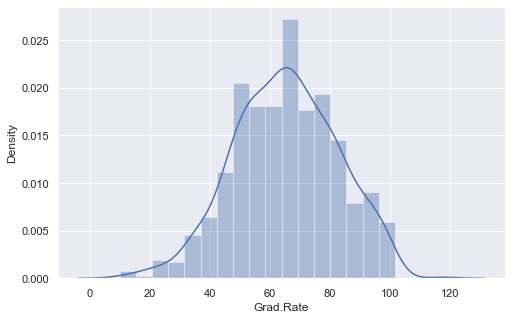

In [26]:
plt.figure(figsize=(8,5))
sns.distplot(df['Grad.Rate'])

<AxesSubplot: xlabel='Outstate', ylabel='F.Undergrad'>

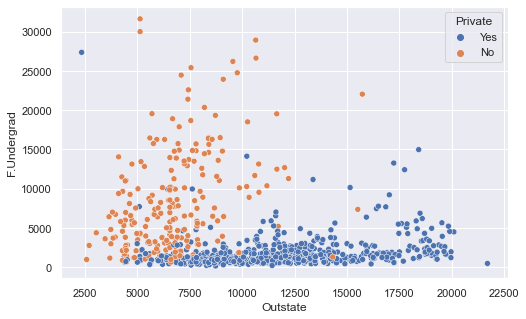

In [5]:
plt.figure(figsize=(8,5))
sns.scatterplot(x ='Outstate', y= 'F.Undergrad', hue = 'Private', data=df  )

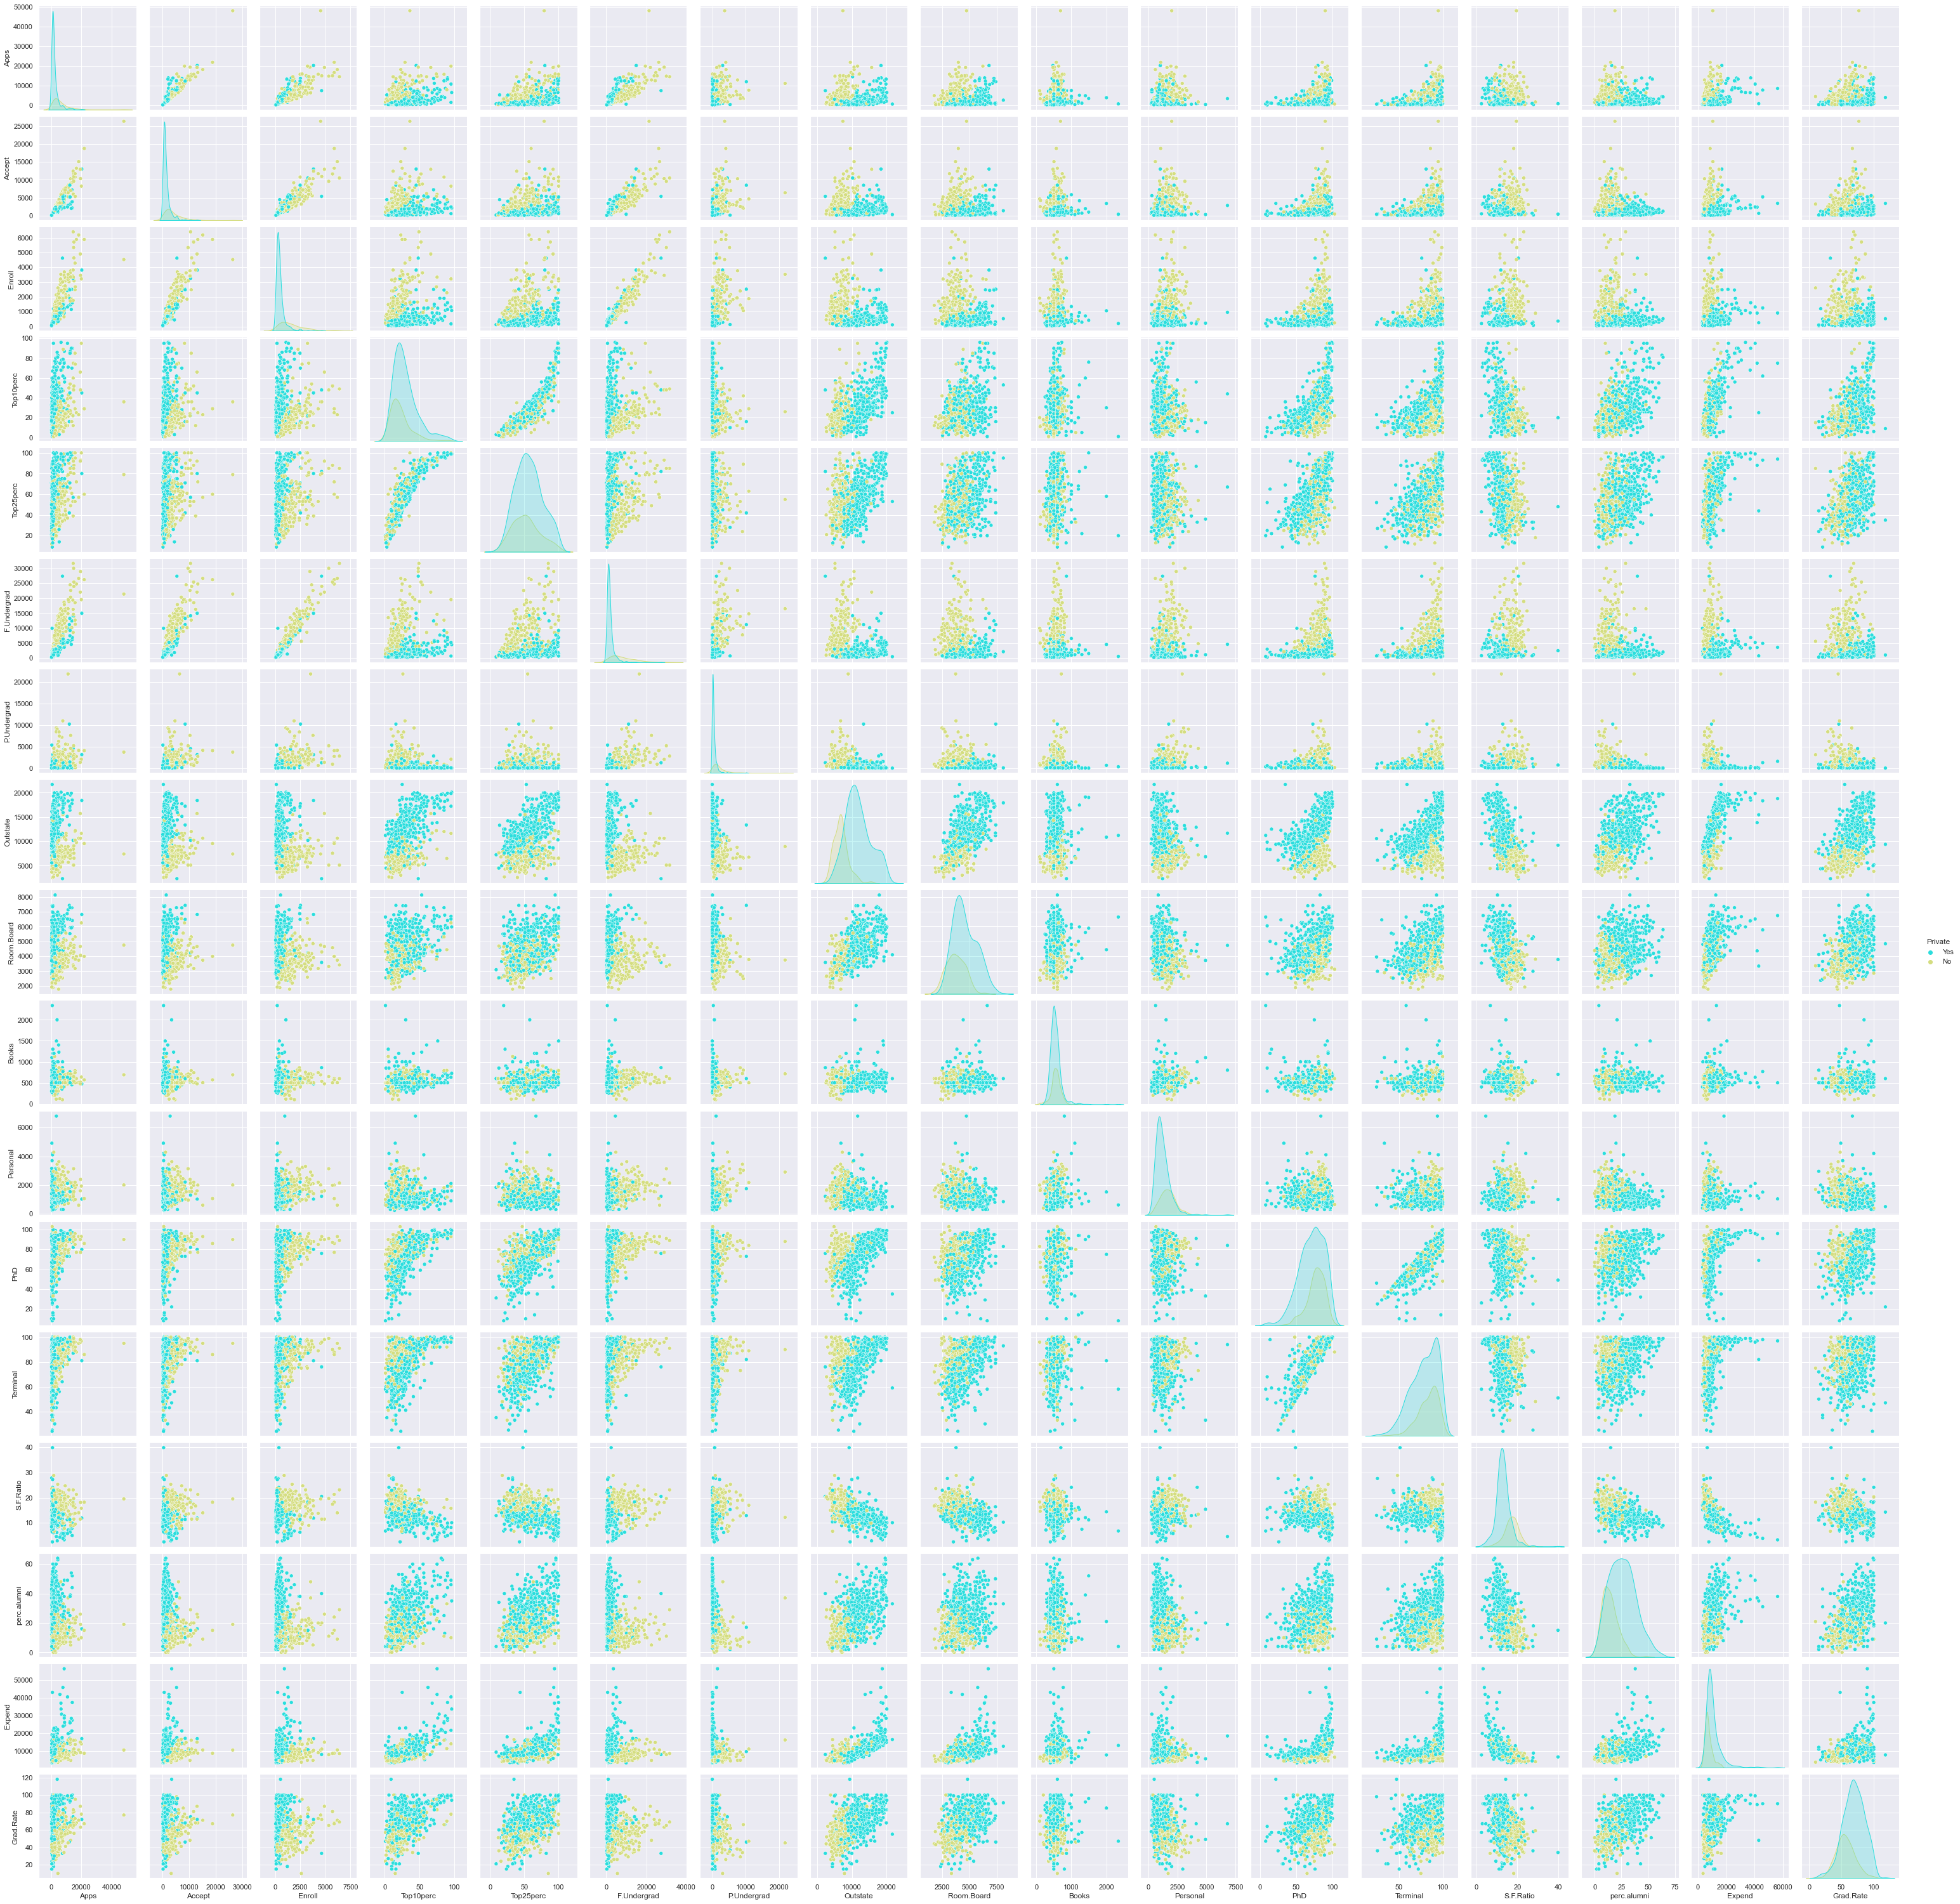

In [35]:
sns.pairplot(data=df,hue='Private',palette='rainbow')

<AxesSubplot: >

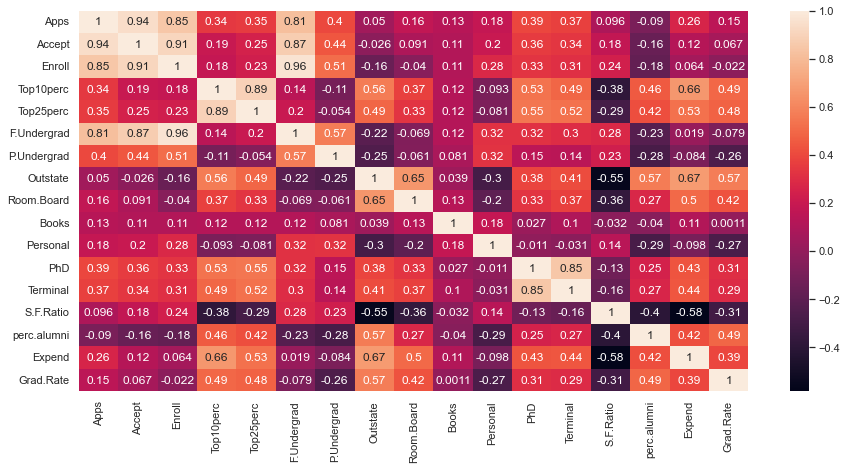

In [30]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

### Model Training

In [35]:
model = KMeans(n_clusters=2)

In [36]:
model.fit(df.drop('Private',axis=1))

KMeans(n_clusters=2)

In [37]:
model.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [38]:
def func(private):
    if private == 'Yes':
        return 1
    else:
        return 0

In [39]:
df['Cluster'] = df['Private'].apply(func)

In [40]:
df.head(2)

Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  \
Abilene Christian University       18.1           12    7041         60   
Adelphi University                 12.2           16   10527         56   

                              Cluster  
Abilene Christian University        1  
Adelphi University                  1

### Model Evaluation

In [41]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [42]:
print(classification_report(df['Cluster'],model.labels_))

              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



In [43]:
print(confusion_matrix(df['Cluster'],model.labels_))

[[138  74]
 [531  34]]


# 